# Image segmentation
## intensity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage import data, filters, color
from skimage.color import rgb2gray

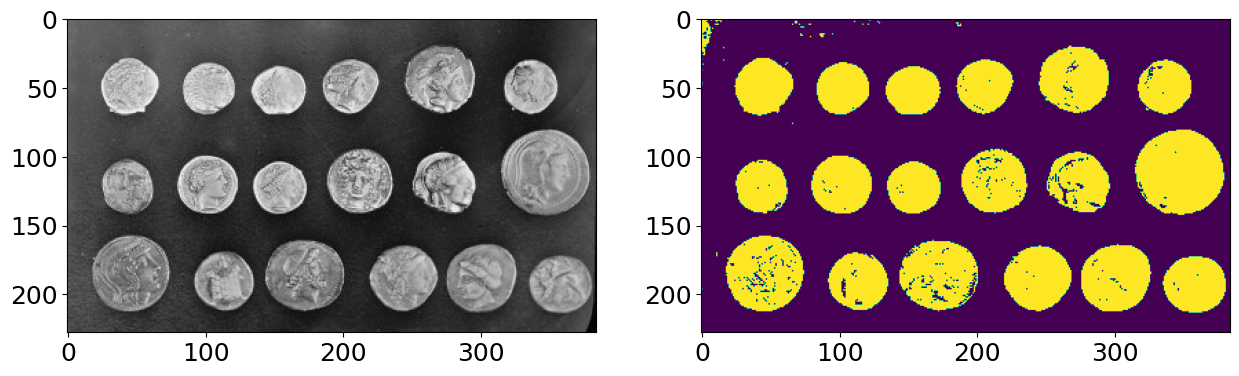

In [5]:
coins = data.coins()
coins = coins[75:, :]
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.imshow(coins, cmap= 'gray')
plt.subplot(122)

segmentation_mask_of_coins = coins > 100

plt.imshow(segmentation_mask_of_coins)


Segmenting the image by thresholding means that I set a certain threshold and set a condition. If the pixels in the image have a higher value than the given threshold, they will be displayed, if they are lower, they will not be displayed.

Text(0, 0.5, 'Pixel count ')

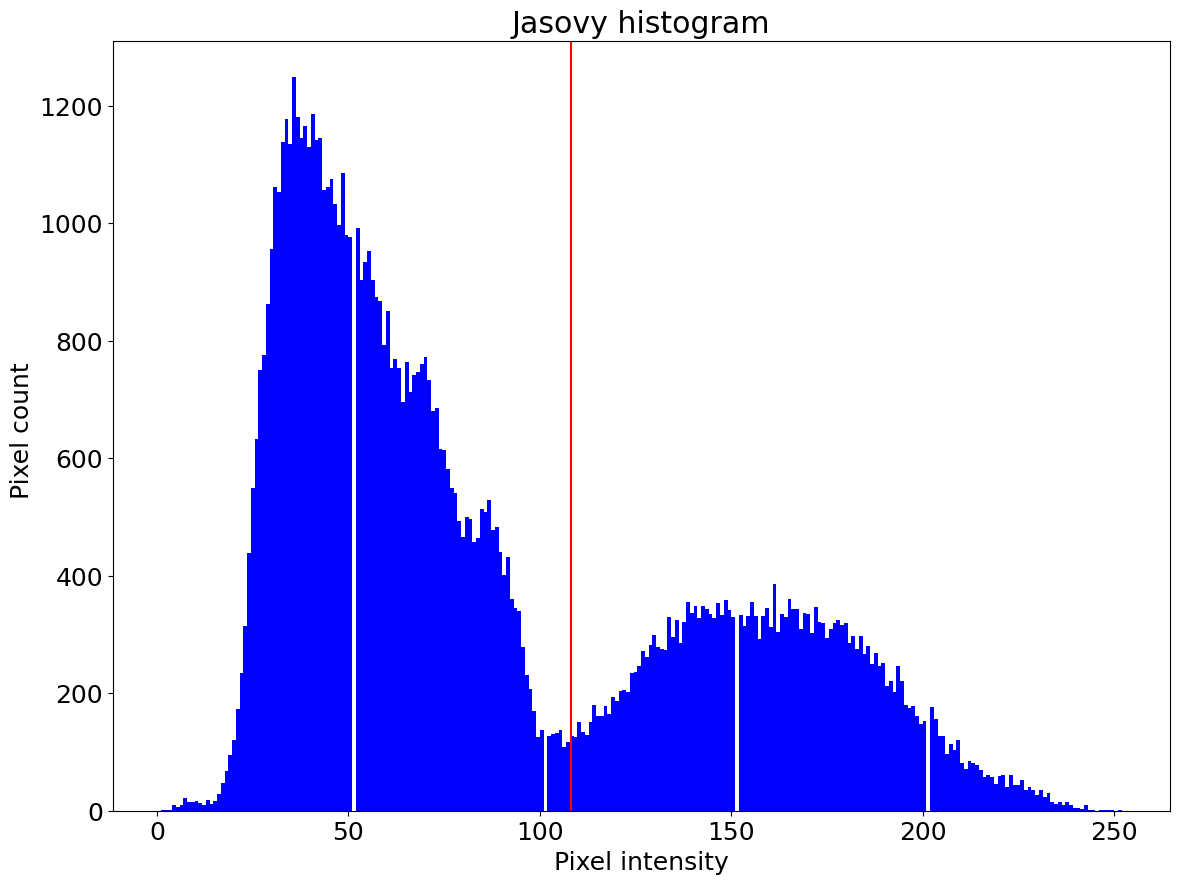

In [4]:
plt.figure(figsize= (30, 10))

ax1 = plt.subplot(121)
plt.hist(coins.ravel(), bins= 256, histtype= 'bar', color= 'blue')
ax1.axvline(108.136, color= 'r')
plt.title("Jasovy histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count ")

In the histogram we can see two distinct peaks. Optimally, the threshold should be located at the intersection of these two curves.

One of the ways to automatically find the value of the threshold is to try to find the intersection of the mentioned Gaussian curves. If the brightness values of background and object pixels are Gaussian distributed, this value will be optimal.

We will calculate the average value of the hashes of the foreground points, which at initialization are all the points of the image, except for the mentioned corner points. The threshold initialization value is calculated as the average of the background and foreground brightness values. The image is further thresholded with the current value. We calculate the new background and foreground values and then the new threshold value. The cycle ends if the new threshold value differs from the flood value by only a little, in our case 0.1

114.0899203235461
Converged to optimal threshold in 4 iteration with threshold: 108.13560341311842


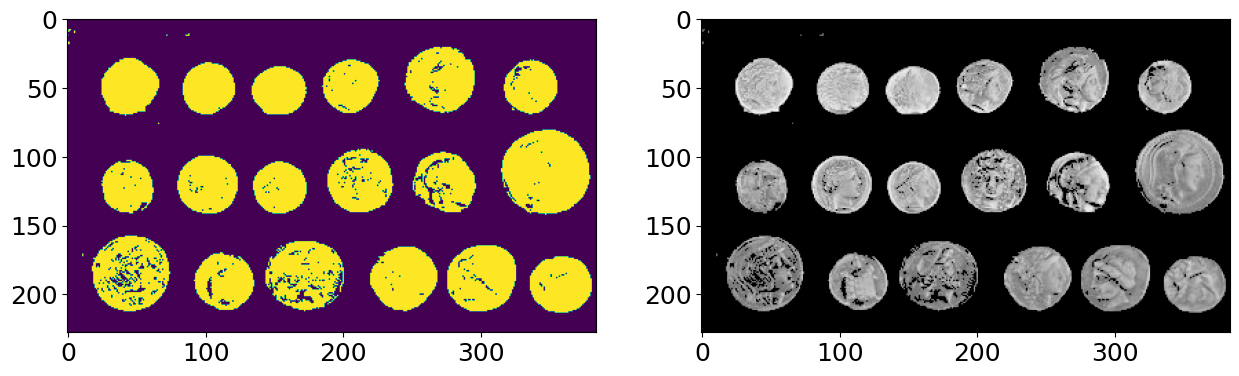

In [5]:
segCoins = coins > 130

meanObjectIntensity = np.mean(coins[segCoins])

meanBackgroundIntensity = np.mean(coins[segCoins == False])



trshld = (meanObjectIntensity + meanBackgroundIntensity) / 2
print(trshld)
counter = 0

while True:
    background = coins < trshld
    obj = coins >= trshld
    meanObjectIntensity = np.mean(coins[obj])
    meanBackgroundIntensity = np.mean(coins[background])
    newTrshld = (meanObjectIntensity + meanBackgroundIntensity) / 2
    counter = counter + 1
    if np.abs(trshld - newTrshld) < 0.01:
        break


    trshld = newTrshld


print("Converged to optimal threshold in {} iteration with threshold: {}".format(counter, trshld))

plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.imshow(coins > trshld)
plt.subplot(122)
plt.imshow(coins * (coins > trshld), cmap= 'gray')

In [6]:
my_new_output = coins * segmentation_mask_of_coins
my_new_output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
coins

array([[110, 105, 102, ...,  66,  64,  69],
       [106, 104, 102, ...,  67,  65,  68],
       [105, 104, 104, ...,  68,  66,  68],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [8]:
np.array([5,100,23]) * np.array([True,False,True])

array([ 5,  0, 23])

### Uneven lighting
However, thresholding with one strip for all points of the image is not suitable, for example, if the scene is not evenly lit.

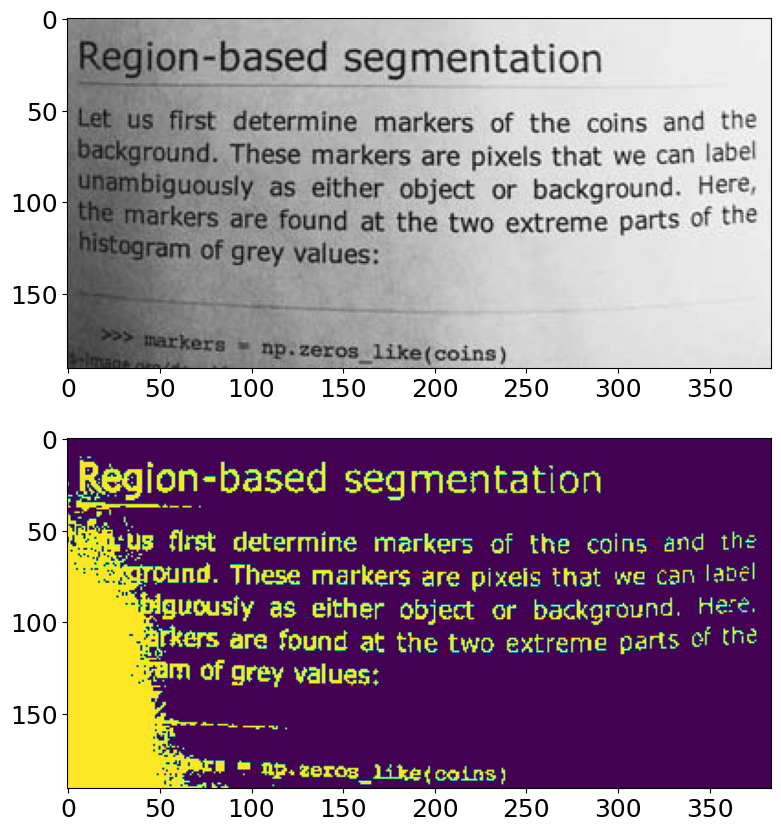

In [10]:
page = data.page()
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(211)
plt.imshow(page, cmap= 'gray')
plt.subplot(212)
plt.imshow(page < 120)

With uneven lighting, we cannot rely only on simple segmentation, as part of the image will be mostly incomprehensible, as you can see in the image above. If we were to set the threshold below a lower value, we would no longer see pixels with a high value, for example the letters on the right side of the image. Since they are more illuminated, they may not be visible if we choose a lower threshold for letters in the shadow.

### A quick overview of the different segmentation algorithms available in SKimage.

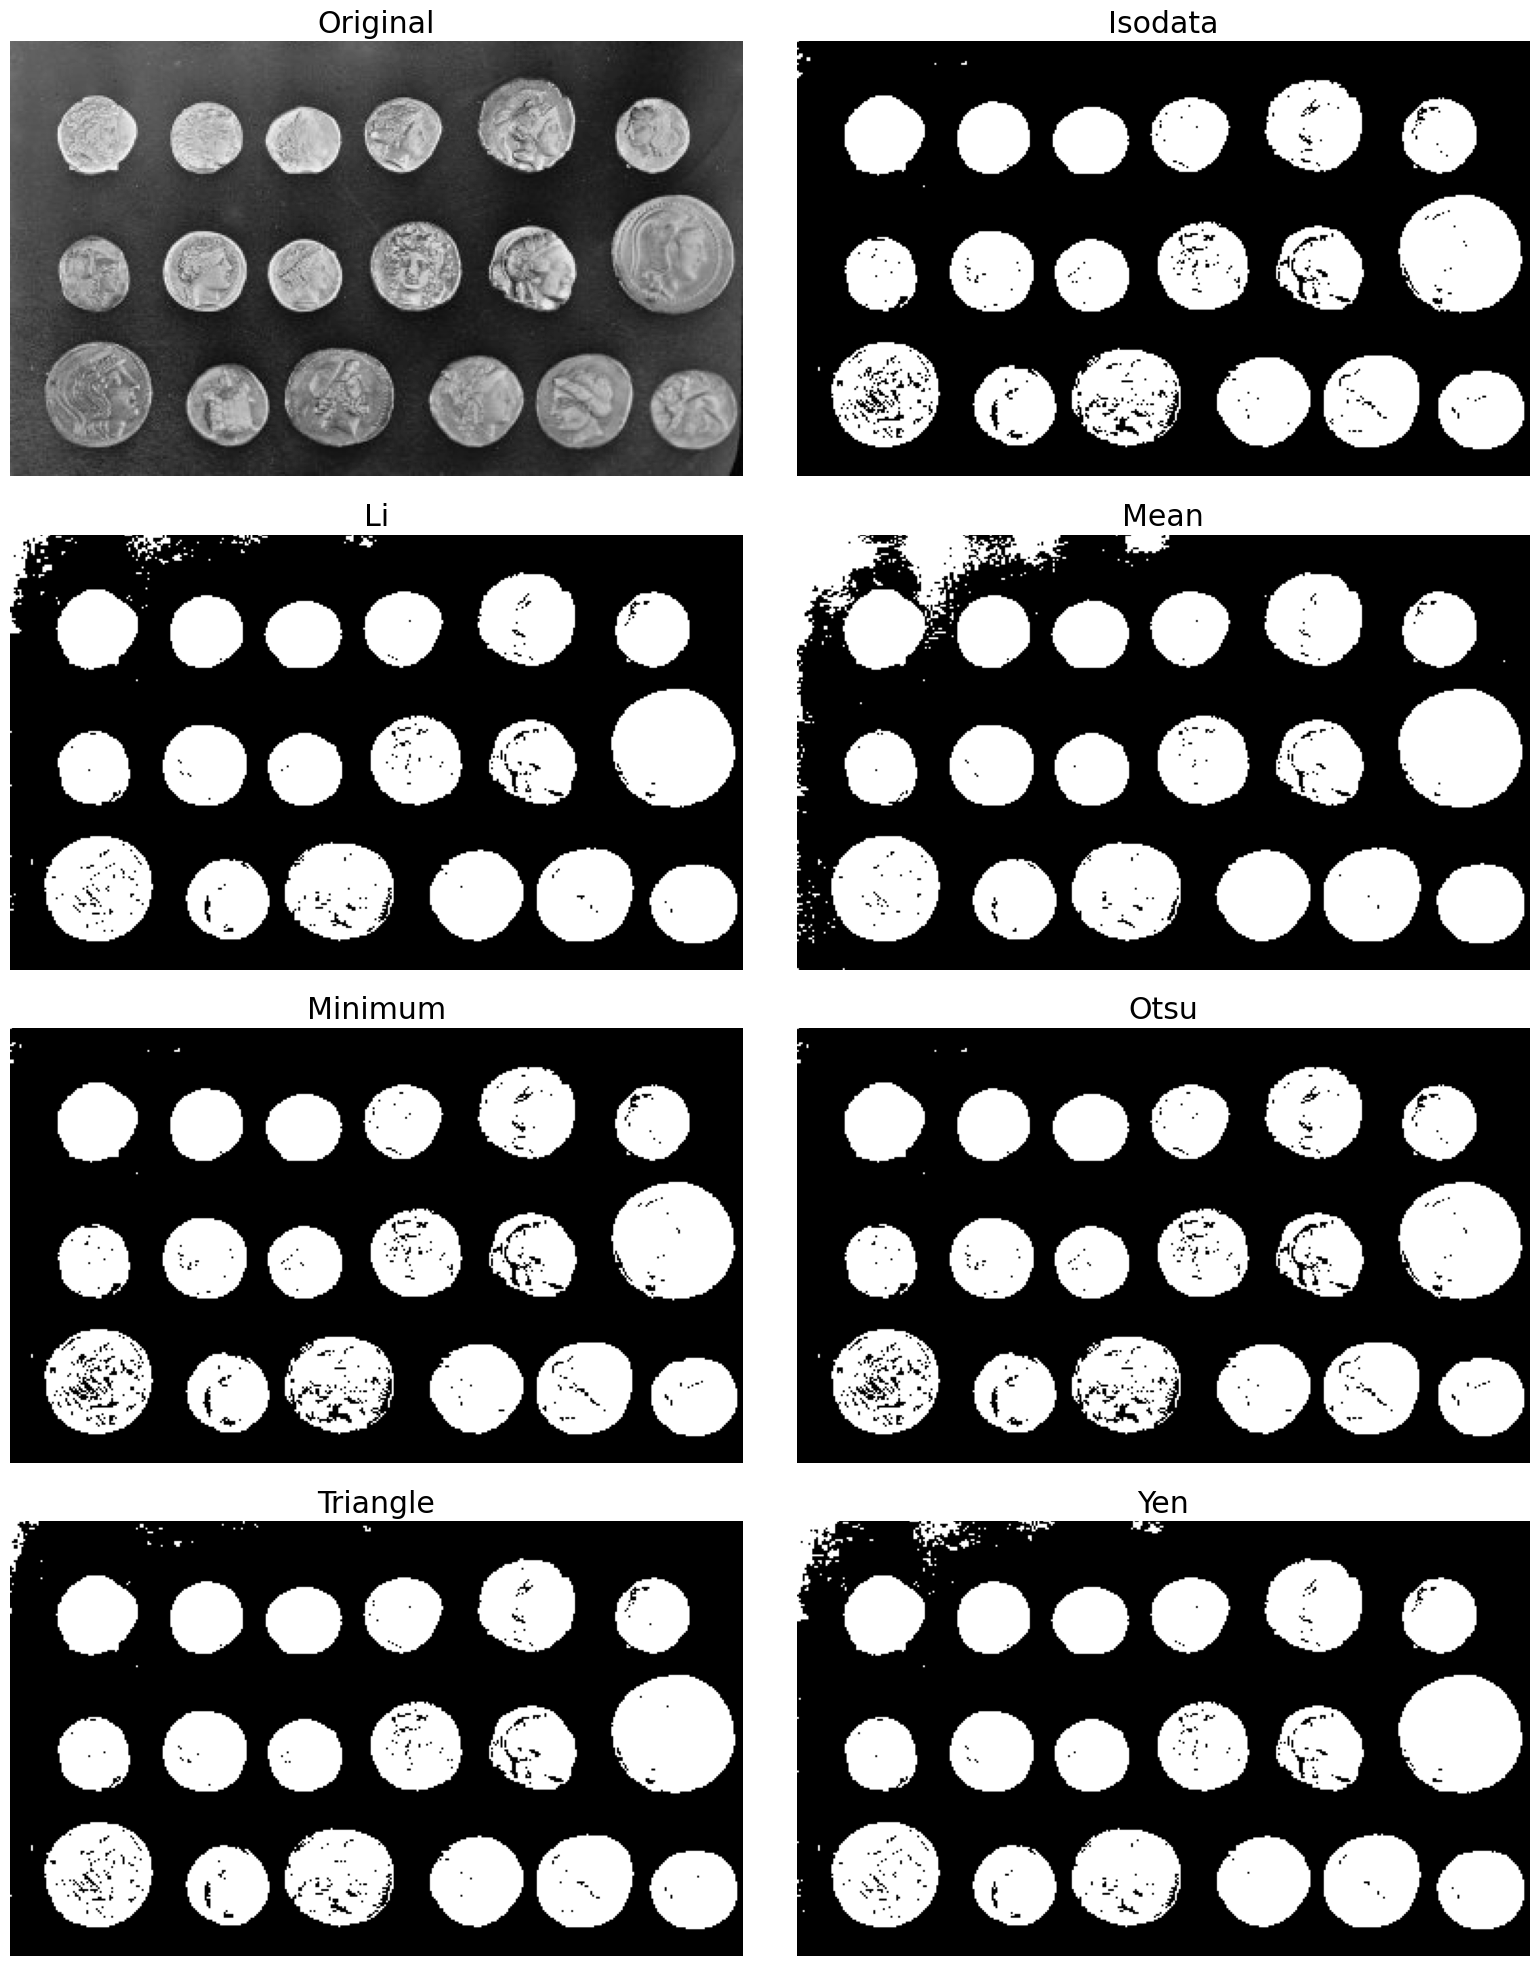

In [13]:
fig, ax = filters.try_all_threshold(coins, figsize= (16, 20), verbose= False)
plt.rcParams['font.size']=18
plt.show()

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_87800/2531637158.py:3: FutureWarning: `selem` is a deprecated argument name for `mean`. It will be removed in version 1.0. Please use `footprint` instead.
  pageFilt  = filters.rank.mean(pageFloat, selem= sElem) / 255
/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_87800/2531637158.py:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  pageFilt  = filters.rank.mean(pageFloat, selem= sElem) / 255


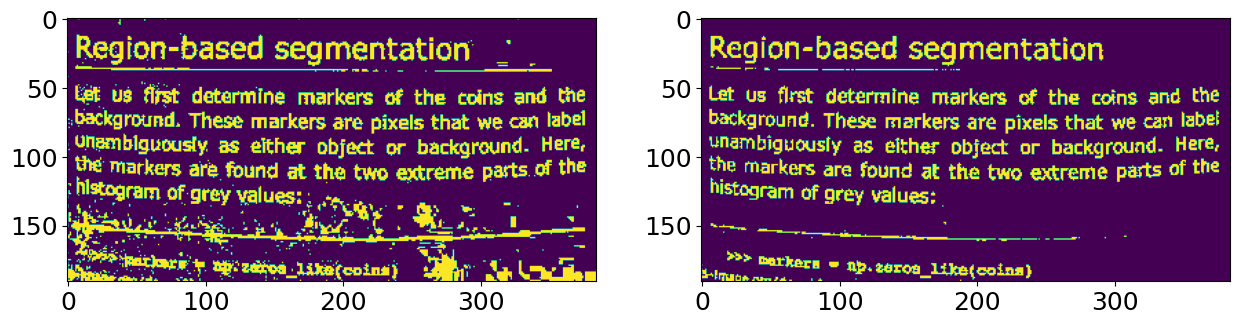

In [14]:
sElem = disk(20)
pageFloat = page / 255
pageFilt  = filters.rank.mean(pageFloat, selem= sElem) / 255

pageT1 = (pageFloat - pageFilt) < 0.0
pageT2 = (pageFloat - pageFilt) < -0.05
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(121)
plt.imshow(pageT1)
plt.subplot(122)
plt.imshow(pageT2)

## Color

Show channels separately -> show color intensity

Text(0.5, 1.0, 'Intensity of Blue')

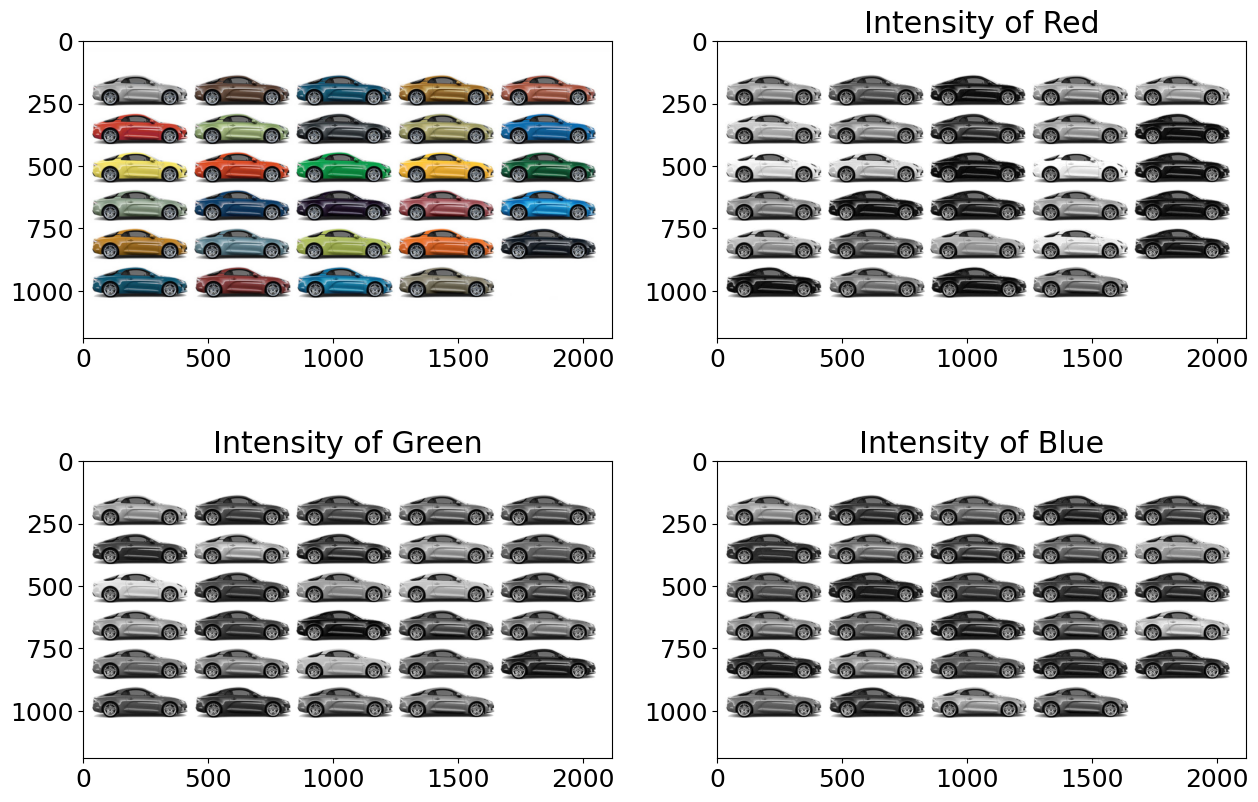

In [10]:
bunky = data.immunohistochemistry()
bunky = plt.imread('../_data/color_cars.jpeg')
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(bunky)
plt.subplot(222)
plt.imshow(bunky[:,:,0], cmap= 'gray')
plt.title('Intensity of Red')
plt.subplot(223)
plt.imshow(bunky[:,:,1], cmap= 'gray')
plt.title('Intensity of Green')
plt.subplot(224)
plt.imshow(bunky[:,:,2], cmap= 'gray')
plt.title('Intensity of Blue')

RGB -> to CIE LAB

In [6]:
bunkyLab = color.rgb2lab(bunky)


plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(bunky)
plt.subplot(222)
plt.imshow(bunkyLab[:,:,0], cmap= 'gray')
plt.title('L')
plt.subplot(223)
plt.imshow(bunkyLab[:,:,1], cmap= 'gray')
plt.title('a')
plt.subplot(224)
plt.imshow(bunkyLab[:,:,2], cmap= 'gray')
plt.title('b')

NameError: name 'bunky' is not defined

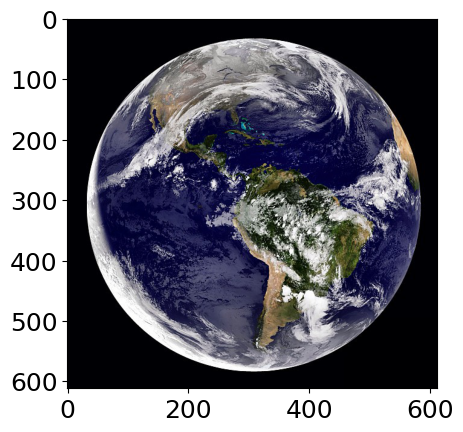

In [25]:
image_earth = plt.imread('../_data/earth.jpg')
plt.imshow(image_earth)

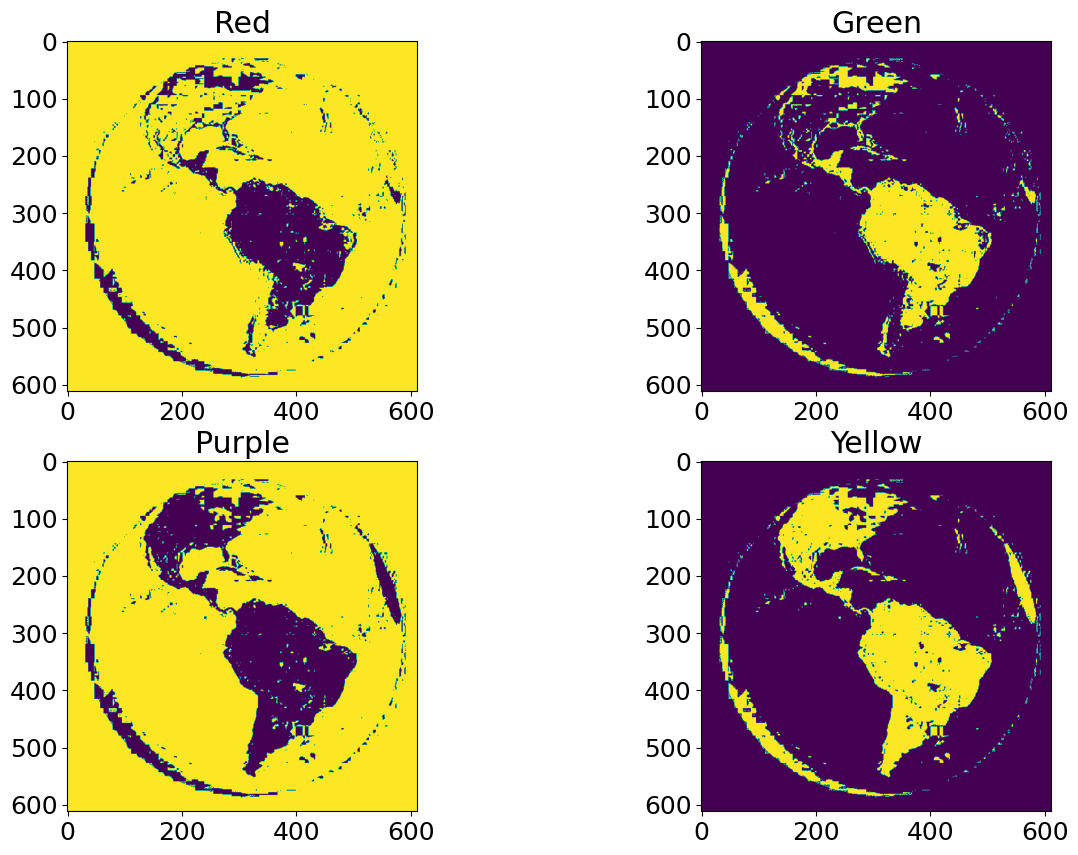

In [13]:
picture = plt.imread('../_data/earth.jpg')
picture = color.rgb2lab(picture)
picRGB = np.uint8(plt.imread('../_data/earth.jpg')*255)

red = np.logical_and(picture[:, :, 1] > 0, picture[:, :, 1] < 100)
green = np.logical_and(picture[:, :, 1] > -100, picture[:, :, 1] < 0)
blue = np.logical_and(picture[:, :, 2] > -100, picture[:, :, 2] < 0)
yellow = np.logical_and(picture[:, :, 2] > 0, picture[:, :, 2] < 100)

plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(221)
plt.title('Red')
plt.imshow(red)
plt.subplot(222)
plt.title('Green')
plt.imshow(green)
plt.subplot(223)
plt.title('Purple')
purple = np.logical_and(red, blue)
plt.imshow(purple)
plt.subplot(224)
plt.title('Yellow')
plt.imshow(yellow)

(1191, 2117, 3)


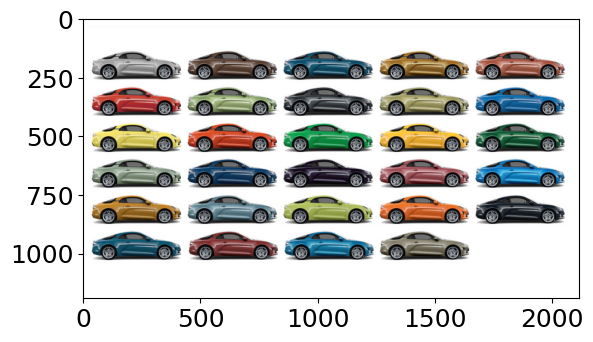

In [19]:
color_cars = plt.imread('../_data/color_cars.jpeg')
print(color_cars.shape)
plt.imshow(color_cars)

In [20]:
cars_lab = color.rgb2lab(color_cars)

In [21]:
cars_lab.shape

(1191, 2117, 3)

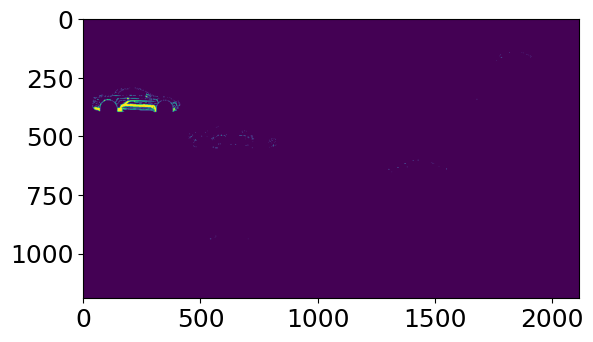

In [30]:
# my_car_mas = cars_lab[:,:,1] > 40
my_car_mas = (cars_lab[:,:,1] > 40) * (cars_lab[:,:,2] < 30)
plt.imshow(my_car_mas)